# CIT AI Youth Camp 2025 - Praktikum 2.1 Klasifikasi Biner
*dipersiapkan oleh: Yozef Tjandra*

Tujuan pembelajaran:
* Peserta mampu mengimplementasikan klasifikasi dengan menggunakan Scikitlearn.
* Peserta mampu menjelaskan komponen-komponen algoritmis dalam klasifikasi.


## 01 Import pustaka untuk melakukan klasifikasi

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 02 Tarik dataset untuk melakukan klasifikasi

* Dataset yang digunakan adalah mengenai klasifikasi jenis tumor berdasarkan banyaknya leukosit dan tekanan darah pasien. 
* Terdapat 2 input/fitur data, yaitu ```"leukocyte_count"``` dan ```"blood_pressure"```. 
* Terdapat dua label yang mungkin dalam output data (memiliki judul kolom ```"tumor_class"```), yaitu ```"malignant"``` (tumor ganas) dan ```"benign"``` (tumor jinak).

In [4]:
# Mengimpor data dari file CSV yang tersedia secara online dan menyimpannya ke dalam DataFrame bernama 'df'
# Sumber data: https://raw.githubusercontent.com/ranjian0/basics/refs/heads/master/data/tumors.csv
df = pd.read_csv('https://raw.githubusercontent.com/ranjian0/basics/refs/heads/master/data/tumors.csv')

# Menampilkan 20 baris pertama dari DataFrame untuk melihat isi dan struktur data
df.head(20)

,leukocyte_count,blood_pressure,tumor_class
0,13.472969,15.250393,malignant
1,10.805510,14.109676,malignant
2,13.834053,15.793920,malignant
3,9.572811,17.873286,malignant
4,7.633667,16.598559,malignant
5,12.795534,16.021330,malignant
6,12.885377,15.402248,malignant
7,16.048327,16.059701,malignant
8,13.486377,14.691901,malignant
9,9.438947,17.223709,malignant


## 03 Visualisasi data

<Axes: xlabel='leukocyte_count', ylabel='blood_pressure'>

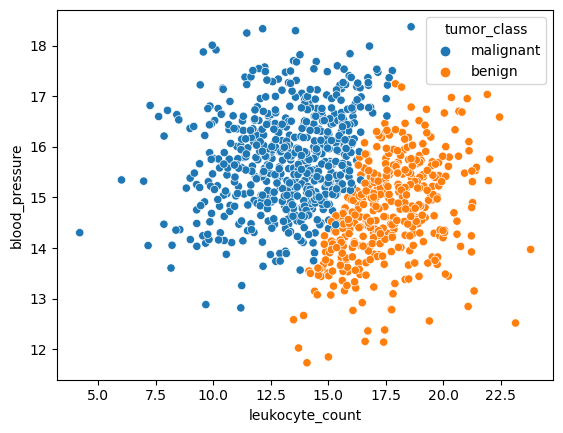

In [5]:
# Membuat plot sebar (scatter plot) menggunakan seaborn
# Sumbu-x mewakili jumlah leukosit (leukocyte_count)
# Sumbu-y mewakili tekanan darah (blood_pressure)
# Warna titik (hue) menunjukkan kelas tumor (tumor_class), misalnya 'benign' atau 'malignant'

sns.scatterplot(x="leukocyte_count", y="blood_pressure", hue="tumor_class", data=df)


## 04 Melakukan pemisahan Data Latih dan Data Uji

In [6]:
# Mengimpor fungsi untuk membagi dataset menjadi data latih dan data uji
from sklearn.model_selection import train_test_split

# Memilih dua fitur sebagai variabel input (fitur): jumlah leukosit dan tekanan darah
X = df[['leukocyte_count', 'blood_pressure']]

# Menetapkan variabel target (label) yaitu kelas tumor
y = df["tumor_class"]

# Membagi data menjadi data latih (80%) dan data uji (20%)
# Parameter random_state memastikan pembagian data bersifat acak tetapi bisa direproduksi (konsisten tiap kali dijalankan)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31)

# Menampilkan jumlah data latih dan data uji
print(f"Jumlah data latih: {len(X_train)}")
print(f"Jumlah data uji: {len(X_test)}")    

# Menampilkan 5 baris pertama dari data latih (fitur)
display(X_train.head(5))

# Menampilkan 5 baris pertama dari data uji (fitur)
display(X_test.head(5))

# Menampilkan 5 label pertama dari data latih
display(y_train.head(5))

# Menampilkan 5 label pertama dari data uji
display(y_test.head(5))

Jumlah data latih: 800
Jumlah data uji: 200


,leukocyte_count,blood_pressure
545,13.516824,15.455063
215,19.363551,14.945209
589,13.781155,13.566283
582,17.471036,14.174971
544,15.666887,16.532945


,leukocyte_count,blood_pressure
975,17.983542,14.546879
558,15.137508,15.670399
222,15.276286,14.103201
899,15.671296,14.476975
913,13.469458,14.628826


545    malignant
215       benign
589    malignant
582       benign
544    malignant
Name: tumor_class, dtype: object

975       benign
558    malignant
222       benign
899       benign
913    malignant
Name: tumor_class, dtype: object

## 05 Membuat dan melatih model Regresi Logistik

In [7]:
# Mengimpor model klasifikasi Logistic Regression dari scikit-learn
from sklearn.linear_model import LogisticRegression

# Membuat objek model Logistic Regression
logreg = LogisticRegression()

# Melatih model menggunakan data latih (fitur dan label)
logreg.fit(X_train, y_train)

# Menggunakan model yang sudah dilatih untuk memprediksi label data uji
y_pred = logreg.predict(X_test)

# Membuat DataFrame untuk membandingkan hasil prediksi dengan label sebenarnya
compare = pd.DataFrame()
compare["leukocyte_count"] = X_test["leukocyte_count"].values  # menyalin fitur leukosit dari data uji
compare["blood_pressure"] = X_test["blood_pressure"].values    # menyalin fitur tekanan darah dari data uji
compare["actual"] = y_test.values                              # label sebenarnya dari data uji
compare["predicted"] = y_pred                                  # label hasil prediksi model
compare["correct"] = compare["actual"] == compare["predicted"] # apakah prediksi benar?

# Menampilkan tabel perbandingan hasil prediksi
display(compare)

,leukocyte_count,blood_pressure,actual,predicted,correct
0,17.983542,14.546879,benign,benign,True
1,15.137508,15.670399,malignant,malignant,True
2,15.276286,14.103201,benign,benign,True
3,15.671296,14.476975,benign,benign,True
4,13.469458,14.628826,malignant,malignant,True
...,...,...,...,...,...
195,13.874118,15.912589,malignant,malignant,True
196,13.994729,15.724878,malignant,malignant,True
197,19.851334,14.245064,benign,benign,True
198,17.742958,14.925907,benign,benign,True


Text(0, 0.5, 'tekanan darah')

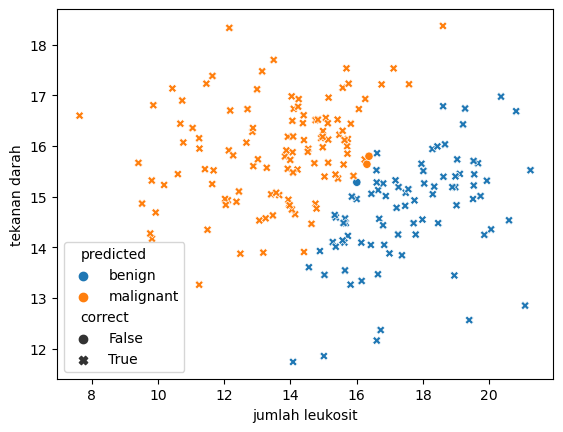

In [8]:
# Membuat scatter plot untuk hasil prediksi model klasifikasi
# Sumbu-x: jumlah leukosit
# Sumbu-y: tekanan darah
# Warna (hue): label hasil prediksi ('predicted') → menunjukkan kelas tumor yang diprediksi
# Bentuk marker (style): menunjukkan apakah prediksi benar atau salah (kolom 'correct')
sns.scatterplot(x="leukocyte_count", y="blood_pressure", hue="predicted", style="correct", data=compare)
plt.xlabel("jumlah leukosit")
plt.ylabel("tekanan darah")




## 06 Memahami hasil regresi logistik

thetha0: 0.959426403947284, theta1: -3.625603386859098, theta2: 3.7216809170377543
Persamaan regresi logistik: 
	p = 1 / (1 + exp(-(0.959426403947284 + -3.625603386859098 * x1 + 3.7216809170377543 * x2)))
Menampilkan plot garis keputusan (decision boundary) dari model klasifikasi


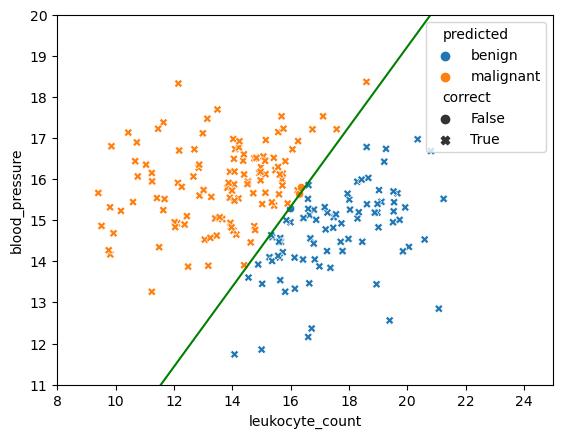

In [11]:
# Mengambil koefisien regresi logistik (theta1 dan theta2) dari model
[[thetha1, thetha2]] = logreg.coef_

# Mengambil nilai intersep (theta0)
[thetha0] = logreg.intercept_

# Menampilkan nilai parameter model
print(f"thetha0: {thetha0}, theta1: {thetha1}, theta2: {thetha2}")

# Menampilkan bentuk fungsi regresi logistik secara matematis
print(f"Persamaan regresi logistik: \n\tp = 1 / (1 + exp(-({thetha0} + {thetha1} * x1 + {thetha2} * x2)))")

# Memberi tahu bahwa plot decision boundary akan ditampilkan
print("Menampilkan plot garis keputusan (decision boundary) dari model klasifikasi")

# Menghitung kemiringan (m) dan intercept (b) dari garis keputusan
m = -thetha1 / thetha2
b = -thetha0 / thetha2

# Fungsi garis keputusan
def boundary(x, m, b):
  return m * x + b

# Membuat rentang nilai x (leukocyte_count) untuk menggambar garis
x_plot = np.linspace(8, 25, 1000)

# Menghitung nilai y (blood_pressure) dari garis keputusan
y_plot = boundary(x_plot, m, b)

# Menyusun data garis menjadi DataFrame
data_boundary = pd.DataFrame({"x": x_plot, "y": y_plot})

# Membuat scatter plot prediksi model seperti sebelumnya
p1 = sns.scatterplot(data=compare, x="leukocyte_count", y="blood_pressure", hue="predicted", style="correct")

# Menambahkan garis keputusan ke plot
p2 = sns.lineplot(data=data_boundary, x='x', y='y', color='g')

plt.xlim(8, 25)  # Mengatur batas sumbu-x
plt.ylim(11, 20)  # Mengatur batas sumbu-y

# Menampilkan plot
plt.show()

## 07 Mengevaluasi model

Jumlah data yang benar diprediksi: 197
Jumlah data yang salah diprediksi 3


,leukocyte_count,blood_pressure,actual,predicted,correct
48,16.002700,15.283569,malignant,benign,False
91,16.308192,15.639111,benign,malignant,False
123,16.370443,15.797743,benign,malignant,False


Akurasi model pada data uji: 0.985


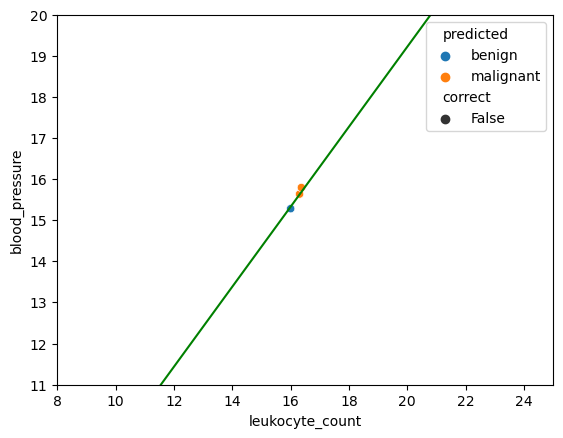

In [ ]:
# Menampilkan jumlah data yang diprediksi dengan benar
print("Jumlah data yang benar diprediksi:", len(compare[compare["correct"] == True]))

# Menampilkan jumlah data yang salah diprediksi
print("Jumlah data yang salah diprediksi", len(compare[compare["correct"] == False]))

# Menampilkan tabel data yang salah diprediksi (misalnya prediksi benign tapi sebenarnya malignant)
display(compare[compare["correct"] == False])

# Menampilkan akurasi model secara keseluruhan
print("Akurasi model pada data uji:", logreg.score(X_test, y_test)) 


# Visualisasi titik-titik yang salah diprediksi
# Titik berwarna sesuai prediksi (hue), dan bentuknya tetap berdasarkan 'correct' meskipun semua salah di sini
p1 = sns.scatterplot(
    data=compare[compare["correct"] == False],
    x="leukocyte_count",
    y="blood_pressure",
    hue="predicted",
    style="correct"
)

# Menambahkan garis keputusan ke dalam plot
p2 = sns.lineplot(data=data_boundary, x='x', y='y', color='g')

# Mengatur rentang tampilan sumbu x dan y agar fokus ke area data
plt.xlim(8, 25)
plt.ylim(11, 20)

# Menampilkan plot
plt.show()

## Tugas Praktikum

1. Gantilah ukuran train-test split data menjadi 75%-25%.
2. Gunakan tanggal lahir Anda sebagai ```random_state```.
3. Jalankan ulang proses klasifikasi seperti pada notebook ini dan amati perbedaan atau persamaannya.